In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
data = pd.read_csv("C:/Users/dinesh mishra/OneDrive/newProject/customer_booking_British_Airways_MLmodel/customer_booking.csv", encoding="ISO-8859-1")


In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# Display basic statistics of the dataset
data.describe(include='all')


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [8]:
# Display the first few rows of the dataset
data_head=data.head()
data_head

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
# Display basic statistics of the dataset
data_description = data.describe(include='all')

data_description

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,NaN,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,NaN,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,3.814420,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,1.992792,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,4.000000,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,5.000000,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [10]:
# Check for missing values
missing_values = data.isnull().sum()

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Display the columns of the encoded dataset
data_encoded.columns

missing_values, data_encoded.head()


(num_passengers           0
 sales_channel            0
 trip_type                0
 purchase_lead            0
 length_of_stay           0
 flight_hour              0
 flight_day               0
 route                    0
 booking_origin           0
 wants_extra_baggage      0
 wants_preferred_seat     0
 wants_in_flight_meals    0
 flight_duration          0
 booking_complete         0
 dtype: int64,
    num_passengers  purchase_lead  length_of_stay  flight_hour  \
 0               2            262              19            7   
 1               1            112              20            3   
 2               2            243              22           17   
 3               1             96              31            4   
 4               2             68              22           15   
 
    wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
 0                    1                     0                      0   
 1                    0                     0      

In [11]:


# Create interaction features
data_encoded['lead_time_per_passenger'] = data_encoded['purchase_lead'] / data_encoded['num_passengers']
data_encoded['stay_per_passenger'] = data_encoded['length_of_stay'] / data_encoded['num_passengers']

# Standardize numerical features
scaler = StandardScaler()
data_encoded[['purchase_lead', 'length_of_stay', 'flight_duration', 'lead_time_per_passenger', 'stay_per_passenger']] = scaler.fit_transform(data_encoded[['purchase_lead', 'length_of_stay', 'flight_duration', 'lead_time_per_passenger', 'stay_per_passenger']])


In [12]:

# Split features and target
X = data_encoded.drop(columns=['booking_complete'])
y = data_encoded['booking_complete']

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)


In [13]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Train the model
rf_model.fit(X, y)

# Display cross-validation scores and feature importances
print("Cross-validation scores:", cv_scores)
print("Feature importances:", rf_model.feature_importances_)

Cross-validation scores: [0.8514 0.7632 0.7262 0.4628 0.7415]
Feature importances: [3.04133312e-02 1.02110300e-01 7.31136226e-02 8.93597660e-02
 1.53295695e-02 1.54213132e-02 1.98255465e-02 3.49934418e-02
 5.01687060e-03 4.97839501e-03 1.70544521e-04 5.97699618e-04
 7.44452742e-04 1.38057708e-02 1.31817534e-02 1.32549076e-02
 1.28768140e-02 1.21266354e-02 1.17060597e-02 1.18191005e-02
 1.31904068e-05 4.93702616e-06 1.04779231e-06 6.60838348e-05
 1.00774803e-05 1.19525734e-05 4.80844497e-03 3.28597646e-06
 2.37090005e-04 4.95900754e-05 7.41958105e-05 3.28781652e-04
 2.49902813e-04 8.93843383e-05 3.26770332e-04 5.71520509e-05
 5.79359612e-05 4.01261560e-07 3.52095642e-07 3.85573926e-06
 1.21365865e-04 7.24193580e-06 9.78861727e-06 1.37591713e-04
 4.64523950e-04 3.22928637e-05 6.80751945e-04 4.61416524e-04
 1.17081176e-04 7.04506781e-05 2.31006581e-04 5.88295009e-05
 3.19311671e-04 2.91174253e-04 9.99740286e-05 2.38556777e-06
 8.82981441e-06 2.83731559e-05 4.57796239e-04 4.79697908e-04
 3

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [17]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', class_report)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.8552
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.55      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:
 [[8384  136]
 [1312  168]]


In [23]:
importance=rf_model.feature_importances_
indices=np.argsort(importance)[::-1]
top_indices=indices[:10]

for i in top_indices:
    print(X.columns[i]) 

lead_time_per_passenger
purchase_lead
flight_hour
stay_per_passenger
length_of_stay
flight_duration
num_passengers
booking_origin_Malaysia
wants_in_flight_meals
booking_origin_Australia


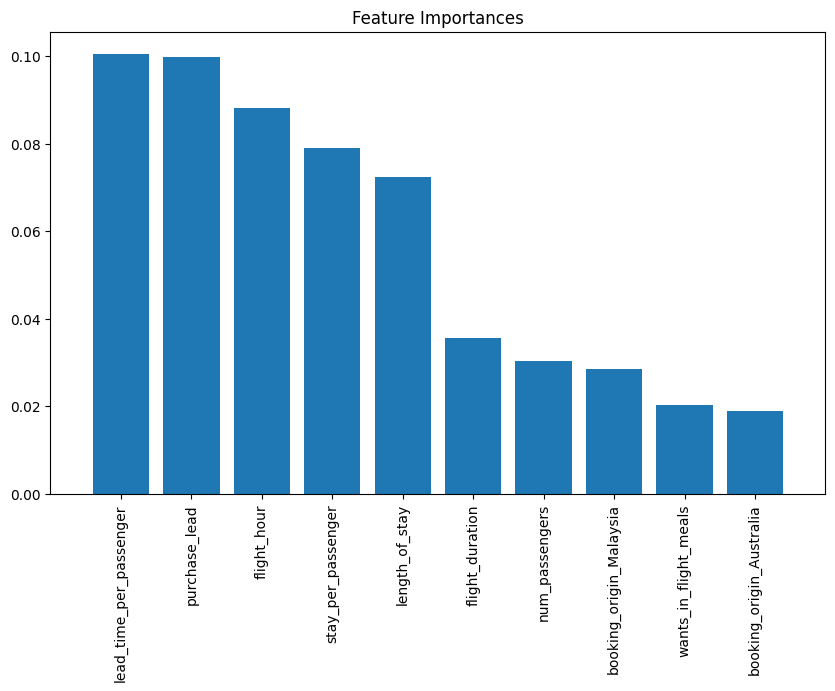

In [27]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[:10]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(top_indices)), importances[top_indices])
plt.xticks(range(len(top_indices)), [X.columns[i] for i in top_indices], rotation=90)
plt.xlim([-1, len(top_indices)])
plt.show()


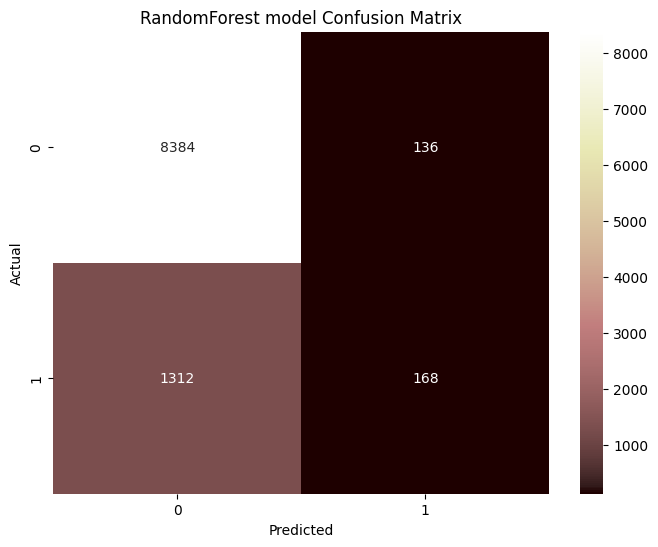

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest model Confusion Matrix')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [37]:
log_reg.fit(X_train, y_train)


c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# Predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_model.predict(X_test)

In [45]:
# Evaluation
# Accuracy
log_reg_acc = accuracy_score(y_test, log_reg_pred)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
log_reg_prec = precision_score(y_test, log_reg_pred)
rf_clf_prec = precision_score(y_test, rf_clf_pred)

In [47]:
# Recall
log_reg_recall = recall_score(y_test, log_reg_pred)
rf_clf_recall = recall_score(y_test, rf_clf_pred)

In [48]:
# F1 Score
log_reg_f1 = f1_score(y_test, log_reg_pred)
rf_clf_f1 = f1_score(y_test, rf_clf_pred)

In [49]:
# Confusion Matrix
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)
rf_clf_conf_matrix = confusion_matrix(y_test, rf_clf_pred)


In [50]:
# ROC Curve and AUC
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
rf_clf_fpr, rf_clf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

In [51]:
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
rf_clf_auc = auc(rf_clf_fpr, rf_clf_tpr)

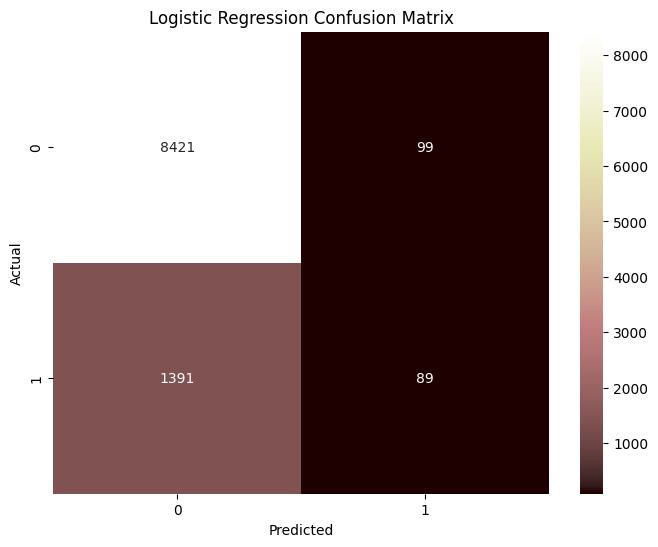

In [52]:
# Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='pink', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

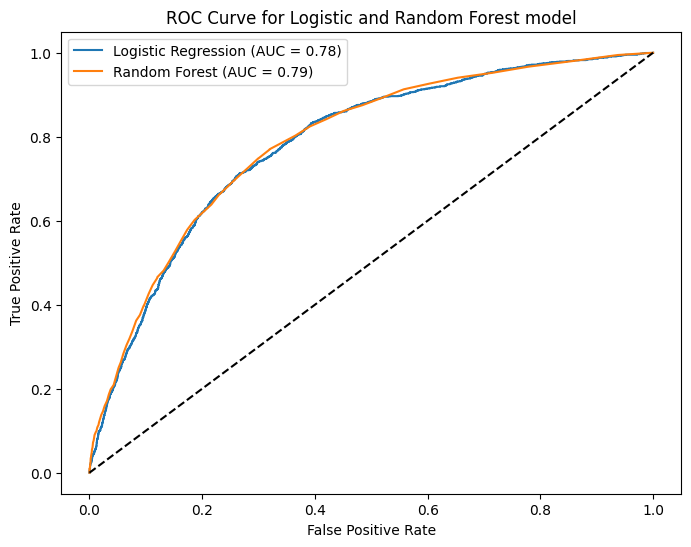

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(rf_clf_fpr, rf_clf_tpr, label=f'Random Forest (AUC = {rf_clf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic and Random Forest model')
plt.legend()
plt.show()

In [54]:
print(f"Logistic Regression - Accuracy: {log_reg_acc}, Precision: {log_reg_prec}, Recall: {log_reg_recall}, F1 Score: {log_reg_f1}")
print(f"Random Forest - Accuracy: {rf_clf_acc}, Precision: {rf_clf_prec}, Recall: {rf_clf_recall}, F1 Score: {rf_clf_f1}")

Logistic Regression - Accuracy: 0.851, Precision: 0.4734042553191489, Recall: 0.06013513513513514, F1 Score: 0.10671462829736211
Random Forest - Accuracy: 0.8552, Precision: 0.5526315789473685, Recall: 0.11351351351351352, F1 Score: 0.18834080717488788


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

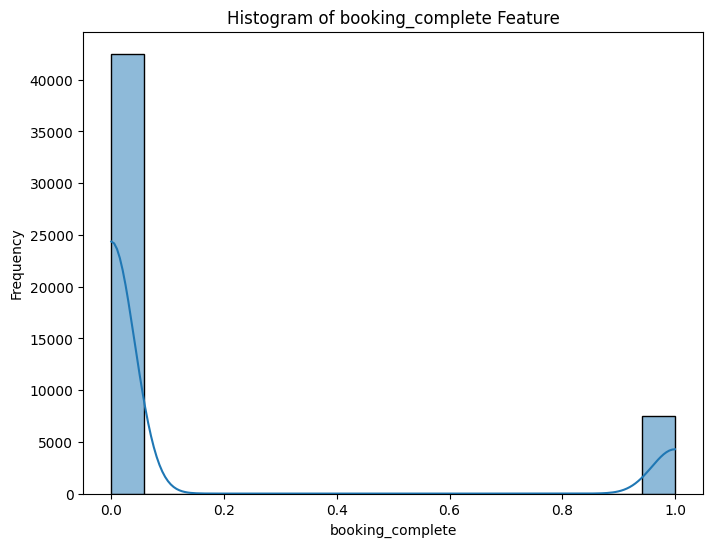

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data['booking_complete'], kde=True) 
plt.title('Histogram of booking_complete Feature')
plt.xlabel('booking_complete')
plt.ylabel('Frequency')
plt.savefig('histogram_selected_feature.png')
plt.show()

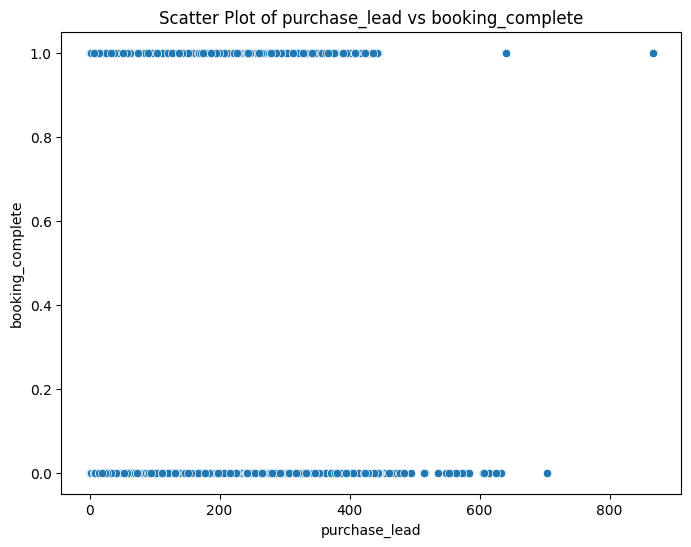

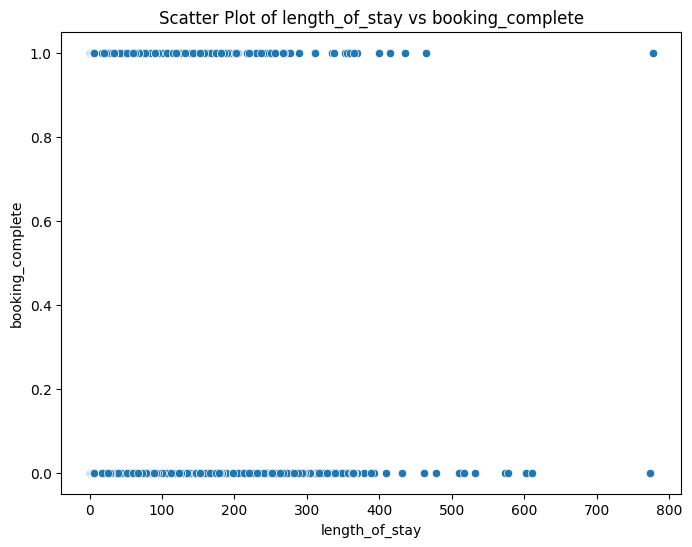

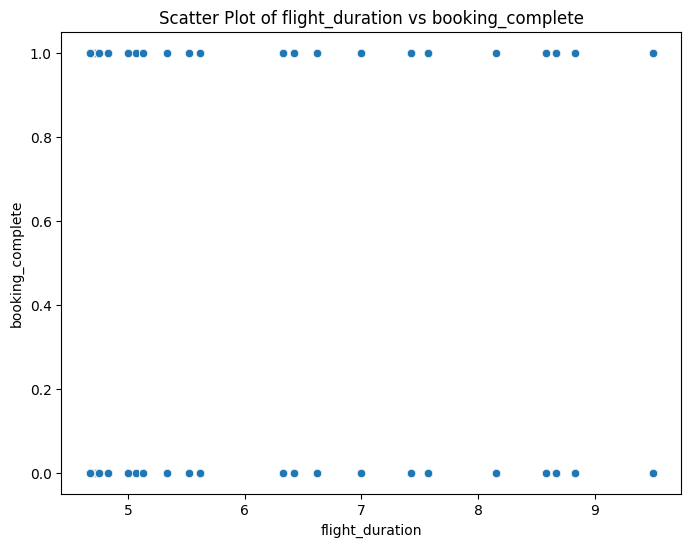

KeyError: 'stay_per_passenger'

<Figure size 800x600 with 0 Axes>

In [57]:
lst=['purchase_lead', 'length_of_stay', 'flight_duration', 'stay_per_passenger']
for feature in lst:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['booking_complete'])  # Replace 'feature1' and 'feature2' with actual feature names
    plt.title(f'Scatter Plot of {feature} vs booking_complete')
    plt.xlabel(feature)
    plt.ylabel('booking_complete')
    plt.savefig(f'scatter_plot_{feature}.png')
    plt.show()

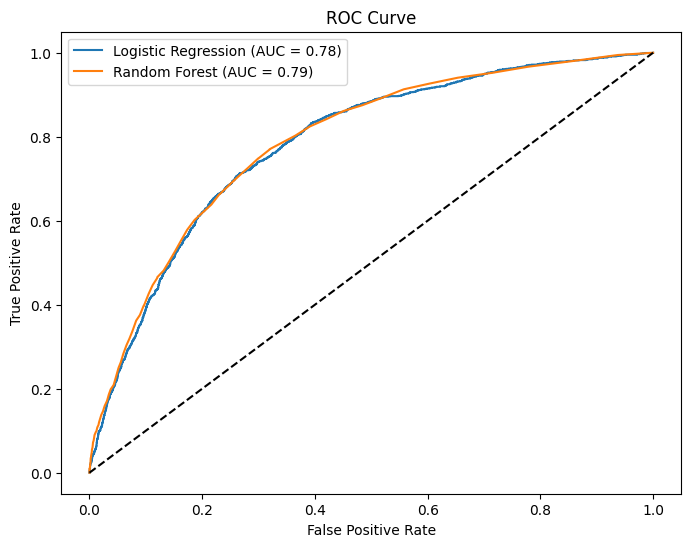

In [58]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_clf_fpr, rf_clf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
rf_clf_auc = auc(rf_clf_fpr, rf_clf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(rf_clf_fpr, rf_clf_tpr, label=f'Random Forest (AUC = {rf_clf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('/mnt/data/roc_curve_comparison.png')
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns

In [60]:
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test))
rf_clf_cm = confusion_matrix(y_test, rf_model.predict(X_test))

In [61]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(50.722222222222214, 0.5, 'Actual')

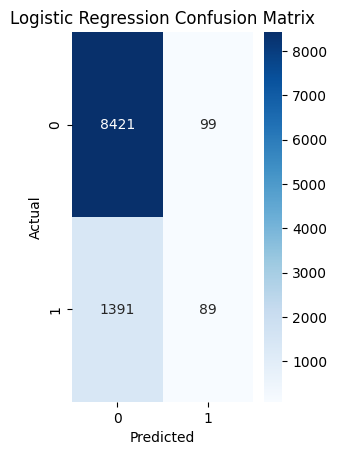

In [62]:
plt.subplot(1, 2, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(321.26767676767673, 0.5, 'Actual')

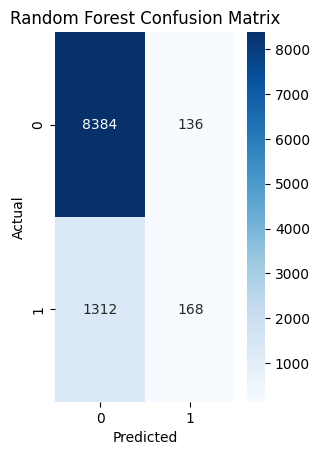

In [63]:
plt.subplot(1, 2, 2)
sns.heatmap(rf_clf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [65]:
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_clf_precision, rf_clf_recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])


In [66]:
log_reg_ap = average_precision_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_clf_ap = average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1])


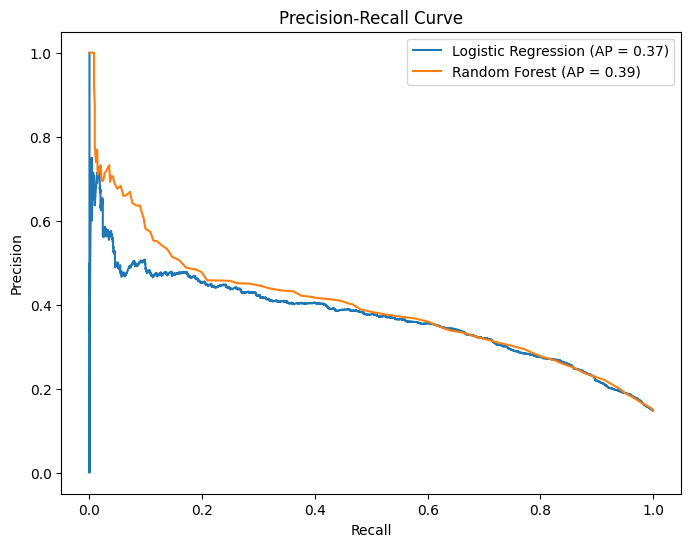

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(log_reg_recall, log_reg_precision, label=f'Logistic Regression (AP = {log_reg_ap:.2f})')
plt.plot(rf_clf_recall, rf_clf_precision, label=f'Random Forest (AP = {rf_clf_ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('precision_recall_comparison.png')
plt.show()

In [68]:
rf_feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(rf_feature_importance)
features = X_test.columns

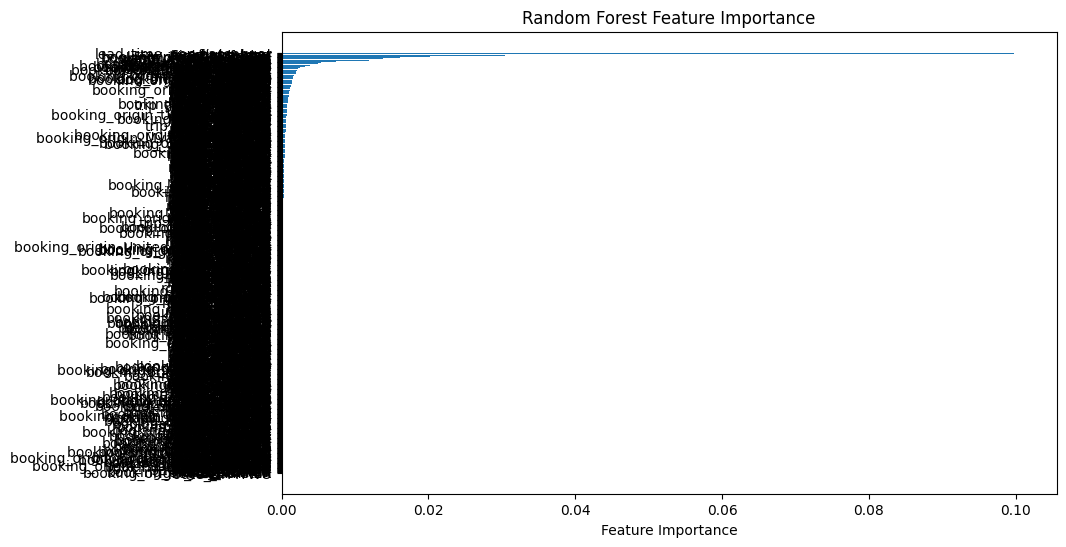

In [69]:

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), rf_feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.savefig('rf_feature_importance.png')
plt.show()

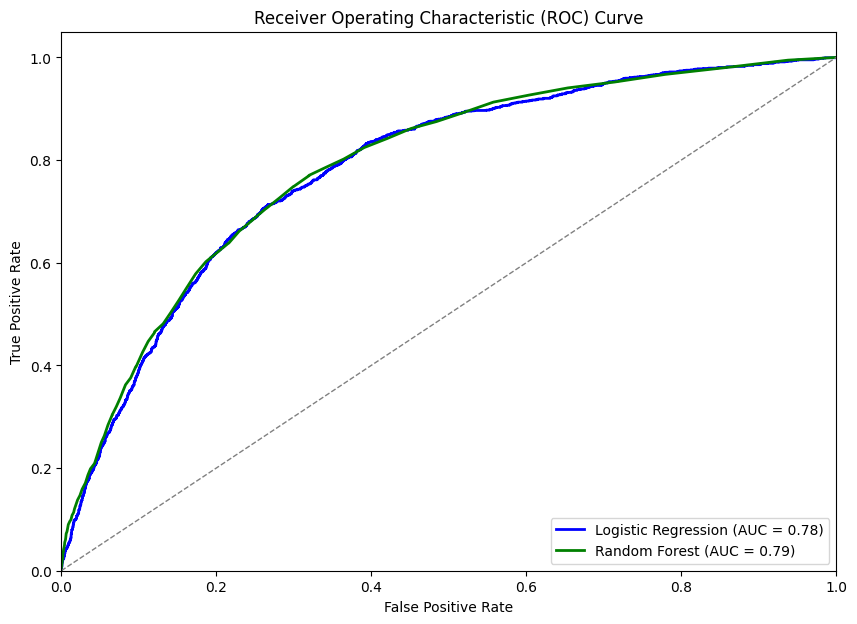

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Saving the plot
plt.savefig('roc_curve_comparison.png')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Train K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Train Support Vector Machine (SVM) model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Train Linear Regression model (using Logistic Regression as a substitute)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Train K-Means Clustering model (requires transforming labels for ROC curve)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans_labels = label_binarize(kmeans.labels_, classes=[0, 1])

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Compute ROC curve and ROC area for Linear Regression
fpr_linear_reg, tpr_linear_reg, _ = roc_curve(y_test, linear_reg.predict(X_test))
roc_auc_linear_reg = auc(fpr_linear_reg, tpr_linear_reg)

# Compute ROC curve and ROC area for K-Means
fpr_kmeans, tpr_kmeans, _ = roc_curve(y_test, kmeans.predict(X_test))
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

# Plotting the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_linear_reg, tpr_linear_reg, color='orange', lw=2, label=f'Linear Regression (AUC = {roc_auc_linear_reg:.2f})')
plt.plot(fpr_kmeans, tpr_kmeans, color='cyan', lw=2, label=f'K-Means (AUC = {roc_auc_kmeans:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Saving the plot
plt.savefig('roc_curve_comparison_multiple_models.png')
plt.show()
